Importing pandas ; Importing numpy ; Importing seaborn ; Importing matplotlib ; Importing monthly progress prediction by book value

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_progress=pd.read_csv('../../data/output/monthly-progress-by-book-value.csv',sep=';')

Creating the mean columns of progress dataframe

In [22]:
years=df_progress['Year'].unique()
prediction_interval=range(2,6)

df_progress = df_progress.set_index(['Year', 'Month'])

for year in years:
    index_year,index_month=df_progress.index.get_level_values('Year'),df_progress.loc[year].index.get_level_values('Month')
    for interval in prediction_interval:
        if year-interval<min(years):
            series_mean=np.nan
        else :
            series_mean=df_progress[(index_year<year)&(index_year>=year-interval)].groupby('Month')['Progress'].mean()
            for month in index_month:
                df_progress.loc[(year,month),str(interval)+' Mean']=series_mean[month]
                
print(df_progress.head())

            Progress  Difference  2 Mean  3 Mean  4 Mean  5 Mean
Year Month                                                      
2014 1      0.825127         NaN     NaN     NaN     NaN     NaN
     2      0.864067    0.038940     NaN     NaN     NaN     NaN
     3      0.887600    0.023533     NaN     NaN     NaN     NaN
     4      0.928349    0.040749     NaN     NaN     NaN     NaN
     5      0.943307    0.014958     NaN     NaN     NaN     NaN


Creating error mean dataframe ; Calculating the error mean

In [23]:
df_error_mean=pd.DataFrame(index=df_progress.index)

for interval in prediction_interval:
    df_error_mean[str(interval)+' Error']=(df_progress['Progress']-df_progress[str(interval)+' Mean'])/df_progress[str(interval)+' Mean']

print(df_error_mean.abs().groupby('Month').mean(),'\n')
print(df_error_mean.abs().mean())


        2 Error   3 Error   4 Error   5 Error
Month                                        
1      0.029595  0.035949  0.045994  0.052794
2      0.042613  0.043426  0.047782  0.048374
3      0.033431  0.030656  0.023252  0.021670
4      0.069937  0.052863  0.055979  0.056749
5      0.064997  0.051467  0.054157  0.047696
6      0.100391  0.100886  0.098847  0.096952
7      0.105046  0.102631  0.102077  0.097287
8      0.093488  0.085899  0.088640  0.088020
9      0.106893  0.099301  0.102891  0.100003
10     0.125998  0.111634  0.104702  0.085041
11     0.116897  0.091658  0.080749  0.066655
12     0.096372  0.080871  0.066450  0.055530 

2 Error    0.082194
3 Error    0.074152
4 Error    0.073283
5 Error    0.069028
dtype: float64


Visualizing the error mean on months

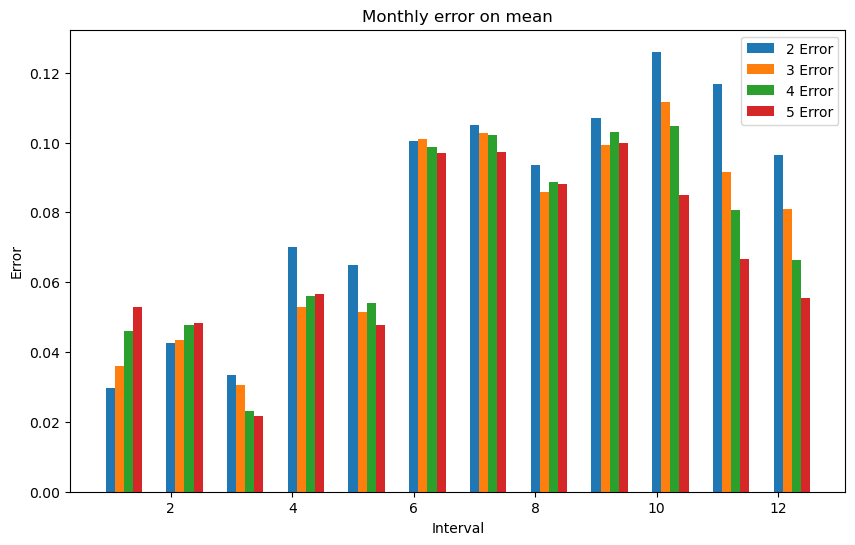

In [24]:
df_temp=df_error_mean.abs().groupby('Month').mean().reset_index()

fig,ax=plt.subplots(figsize=(10,6))
bar_width=0.15

for i,col in enumerate(df_temp.columns[1:]):
    ax.bar(df_temp['Month']+bar_width*i,df_temp[col].abs(),bar_width,label=col)
    
ax.set_title('Monthly error on mean')
ax.set_xlabel('Interval')
ax.set_ylabel('Error')
ax.legend()

plt.show()
